In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

from fancyimpute import KNN

import matplotlib.pyplot as plt

import statistics
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.model_selection import train_test_split,RandomizedSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
data=pd.read_excel('data.xls')

# Exploratory Data Analysis

In [3]:

data.columns=data.columns.str.replace('Work load Average/day ', "Work load Average per Day")

In [4]:
data['Month of absence']= data['Month of absence'].replace(0,np.nan)

In [5]:
data= data.drop(['ID'],axis=1)



In [6]:
data["Work load Average per Day"]=data["Work load Average per Day"].div(1000)

In [7]:
data.columns=data.columns.str.replace(' ','')

In [8]:
num=['Transportationexpense','DistancefromResidencetoWork','Servicetime','Age','WorkloadAverageperDay','Hittarget',
     'Weight','Height','Bodymassindex','Absenteeismtimeinhours']

cat=['Reasonforabsence','Monthofabsence','Dayoftheweek','Seasons','Disciplinaryfailure','Education','Son',
     'Socialdrinker','Socialsmoker','Pet']

# Missing Value Analysis

In [9]:
missing_values=pd.DataFrame(data.isnull().sum())

In [10]:
missing_values=missing_values.reset_index()

In [11]:
missing_values=missing_values.rename(columns= {'index': 'features', 0:'missing_percentage'})

In [12]:
missing_values['missing_percentage']=(missing_values['missing_percentage']/len(data)*100)

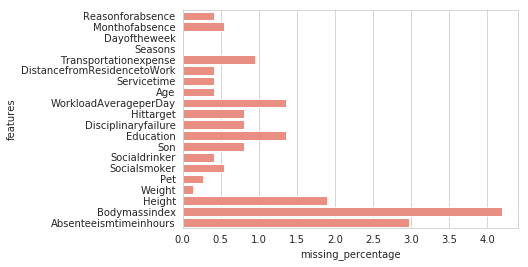

In [13]:
sns.barplot(x='missing_percentage',y='features',data=missing_values, color = 'salmon')
plt.show()

In [14]:
missing_values

,features,missing_percentage
0,Reasonforabsence,0.405405
1,Monthofabsence,0.540541
2,Dayoftheweek,0.000000
3,Seasons,0.000000
4,Transportationexpense,0.945946
5,DistancefromResidencetoWork,0.405405
6,Servicetime,0.405405
7,Age,0.405405
8,WorkloadAverageperDay,1.351351
9,Hittarget,0.810811


In [15]:
# Missing Value analysis for categorical variables
for i in cat:
    print(i)
    data[i] = data[i].fillna(data[i].mode()[0])
    

Reasonforabsence
Monthofabsence
Dayoftheweek
Seasons
Disciplinaryfailure
Education
Son
Socialdrinker
Socialsmoker
Pet


In [16]:
data=pd.DataFrame(KNN(k=3).fit_transform(data),columns=data.columns)


Imputing row 1/740 with 0 missing, elapsed time: 0.333
Imputing row 101/740 with 1 missing, elapsed time: 0.335
Imputing row 201/740 with 0 missing, elapsed time: 0.336
Imputing row 301/740 with 0 missing, elapsed time: 0.337
Imputing row 401/740 with 0 missing, elapsed time: 0.337
Imputing row 501/740 with 0 missing, elapsed time: 0.338
Imputing row 601/740 with 0 missing, elapsed time: 0.338
Imputing row 701/740 with 0 missing, elapsed time: 0.339


# Outlier Analysis

In [17]:

#Load Libraries

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Transportationexpense


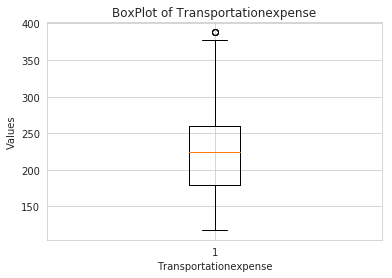

DistancefromResidencetoWork


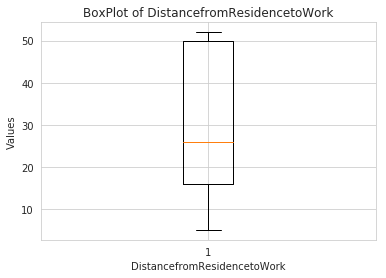

Servicetime


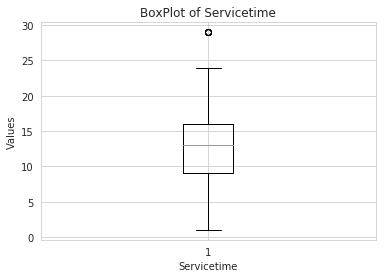

Age


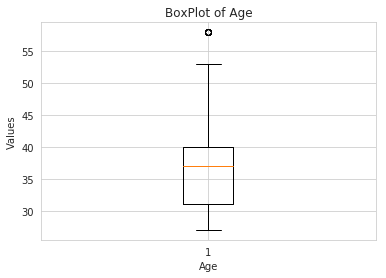

WorkloadAverageperDay


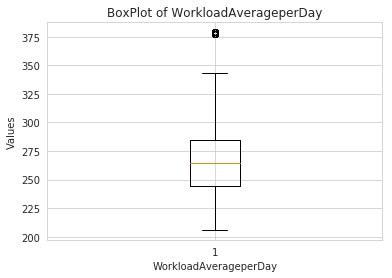

Hittarget


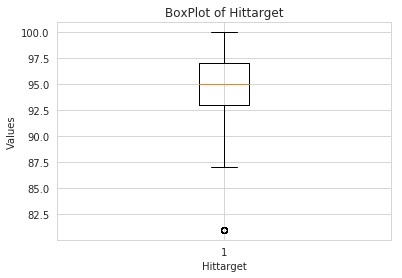

Weight


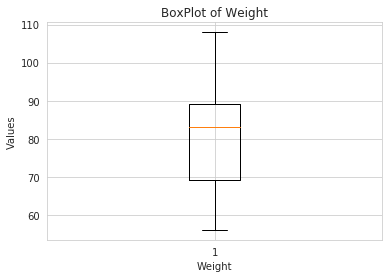

Height


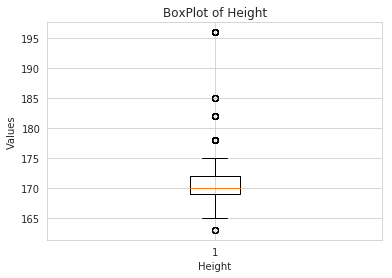

Bodymassindex


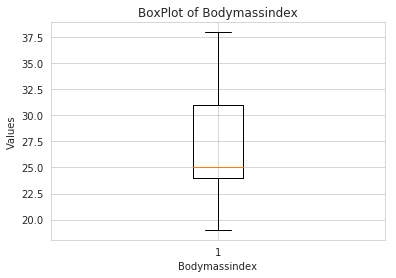

Absenteeismtimeinhours


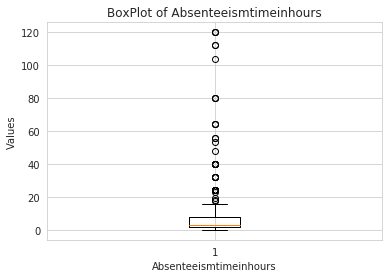

In [18]:
for i in num:
    print(i)
    plt.boxplot(data[i])
    plt.xlabel(i)
    plt.ylabel('Values')
    plt.title("BoxPlot of "+i)
    plt.show()

In [19]:
for i in num:
    q75, q25 = np.percentile(data[i], [75,25]) 
    iqr = q75 - q25
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    data.loc[data[i]< minimum,i] = np.nan
    data.loc[data[i]> maximum,i] = np.nan
    

In [20]:
data.isna().sum()

Reasonforabsence                 0
Monthofabsence                   0
Dayoftheweek                     0
Seasons                          0
Transportationexpense            3
DistancefromResidencetoWork      0
Servicetime                      5
Age                              8
WorkloadAverageperDay           31
Hittarget                       19
Disciplinaryfailure              0
Education                        0
Son                              0
Socialdrinker                    0
Socialsmoker                     0
Pet                              0
Weight                           0
Height                         119
Bodymassindex                    0
Absenteeismtimeinhours          48
dtype: int64

In [21]:
data = pd.DataFrame(KNN(k = 3).fit_transform(data), columns = data.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.142
Imputing row 101/740 with 1 missing, elapsed time: 0.143
Imputing row 201/740 with 0 missing, elapsed time: 0.144
Imputing row 301/740 with 0 missing, elapsed time: 0.146
Imputing row 401/740 with 0 missing, elapsed time: 0.147
Imputing row 501/740 with 0 missing, elapsed time: 0.148
Imputing row 601/740 with 0 missing, elapsed time: 0.149
Imputing row 701/740 with 0 missing, elapsed time: 0.150


# Distribution of the data

Reasonforabsence


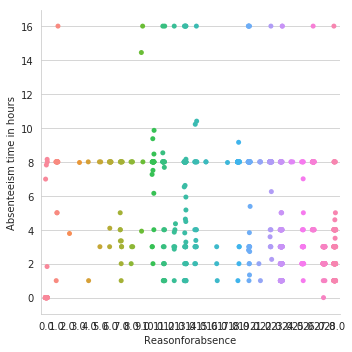

Monthofabsence


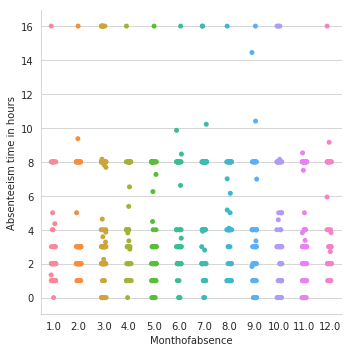

Dayoftheweek


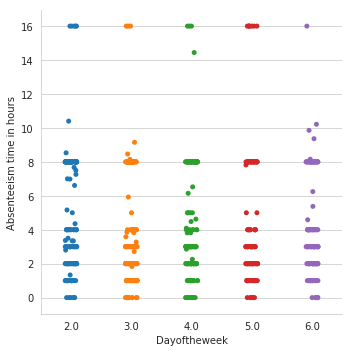

Seasons


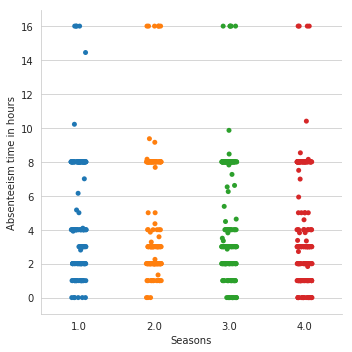

Disciplinaryfailure


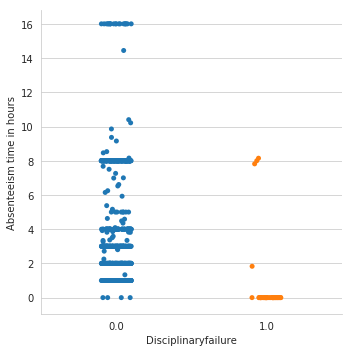

Education


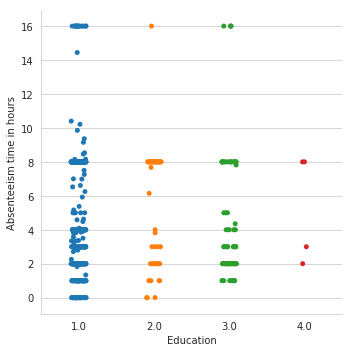

Son


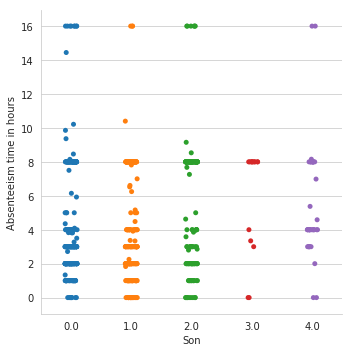

Socialdrinker


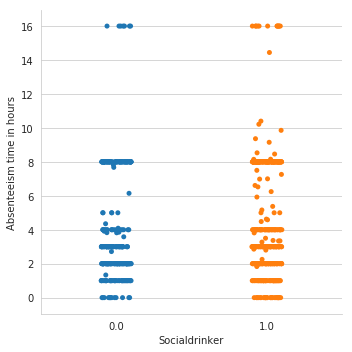

Socialsmoker


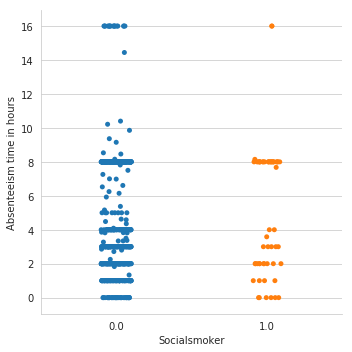

Pet


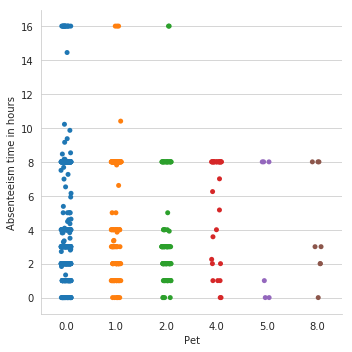

In [22]:
for i in cat:
    print(i)
    sns.catplot(x=i, y="Absenteeismtimeinhours", data=data)
    plt.xlabel(i)
    plt.ylabel('Absenteeism time in hours')
    plt.savefig('{i}_Vs_Absenteeismtimeinhours.png'.format(i=i))
    
    plt.show()


Transportationexpense


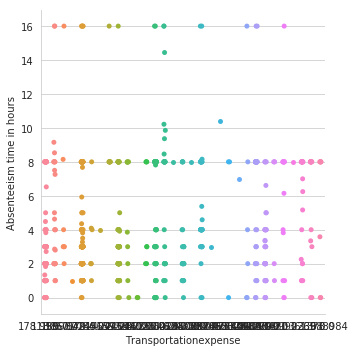

DistancefromResidencetoWork


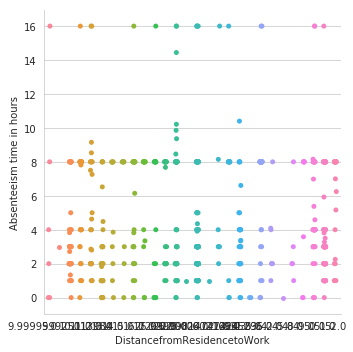

Servicetime


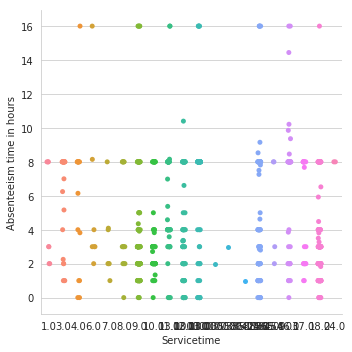

Age


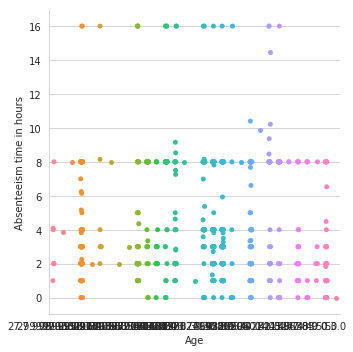

WorkloadAverageperDay


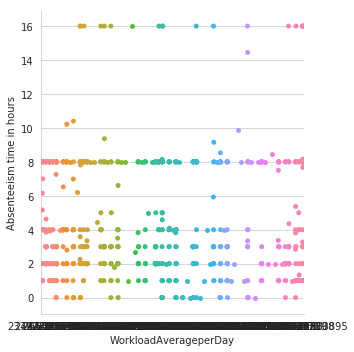

Hittarget


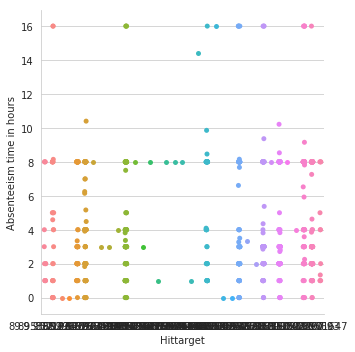

Weight


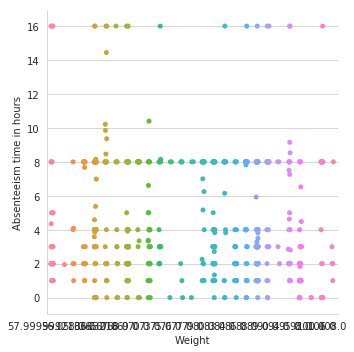

Height


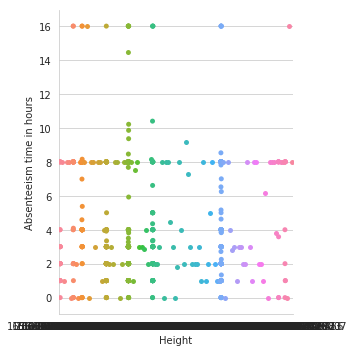

Bodymassindex


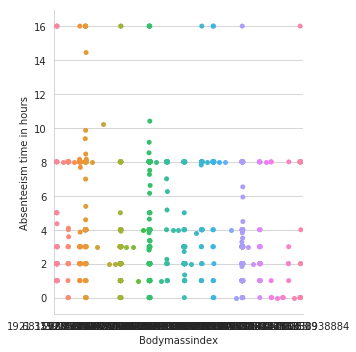

Absenteeismtimeinhours


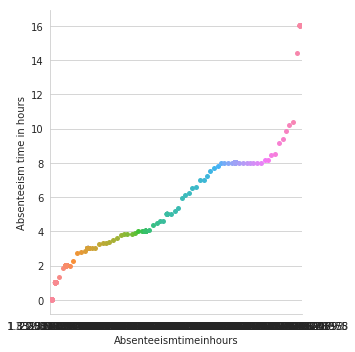

In [23]:
for i in num:
    print(i)
    sns.catplot(x=i, y="Absenteeismtimeinhours", data=data)
    plt.xlabel(i)
    plt.ylabel('Absenteeism time in hours')
    plt.savefig('{i}_Vs_Absenteeismtimeinhours.png'.format(i=i))
    
    plt.show()

In [24]:
num=['Transportationexpense','DistancefromResidencetoWork','Servicetime','Age','WorkloadAverageperDay','Hittarget',
     'Weight','Height','Bodymassindex']

In [25]:
import matplotlib.pyplot as plt

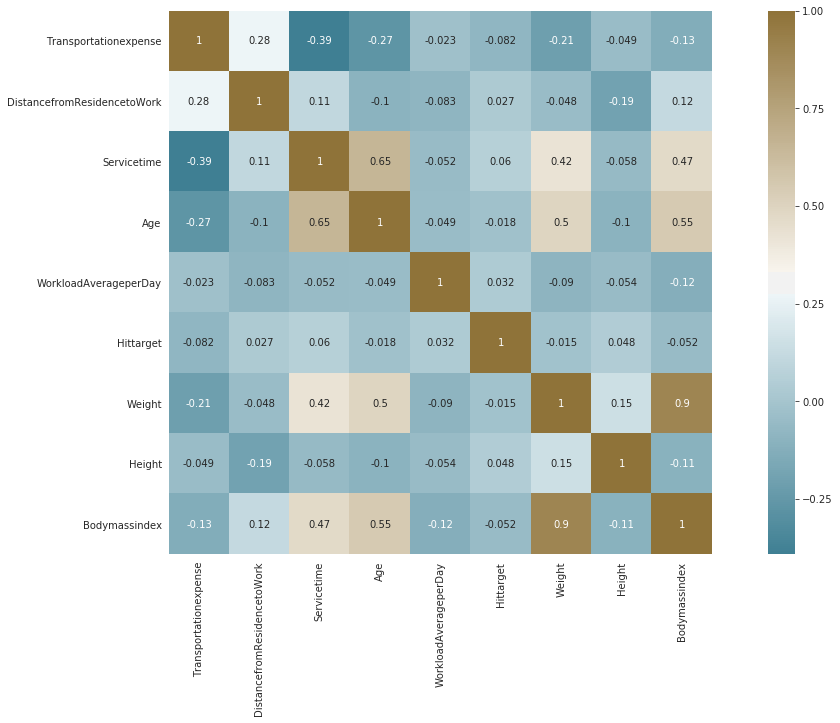

In [26]:
#Build Correlation Plot

data_corr=data.loc[:,num]
f, ax = plt.subplots(figsize=(20, 10))
corr = data_corr.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 60, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()
plt.show()

#  ANOVA Test

In [27]:
from statsmodels import *
from statsmodels.formula.api import ols
from scipy import *
from statsmodels.stats.anova import anova_lm

In [28]:
from scipy import stats

In [29]:
formula = 'Absenteeismtimeinhours ~ C(Seasons)+C(Monthofabsence)+C(Pet)+C(Son)+C(Socialdrinker)+C(Reasonforabsence)+C(Dayoftheweek)+C(Disciplinaryfailure)+C(Education)+C(Socialsmoker)  '


In [30]:
model = ols(formula, data=data).fit()

In [31]:
aov_table = anova_lm(model, typ=2)

In [32]:
aov_table

,sum_sq,df,F,PR(>F)
C(Seasons),37.648813,3.0,1.812171,1.435738e-01
C(Monthofabsence),85.352996,11.0,1.120457,3.418676e-01
C(Pet),61.877766,5.0,1.787038,1.132650e-01
C(Son),111.927376,4.0,4.040597,3.023878e-03
C(Socialdrinker),64.040599,1.0,9.247505,2.448953e-03
C(Reasonforabsence),2338.928454,27.0,12.508994,1.073539e-43
C(Dayoftheweek),15.194311,4.0,0.548517,7.001729e-01
C(Disciplinaryfailure),6.123839,1.0,0.884287,3.473647e-01
C(Education),38.709719,3.0,1.863236,1.344578e-01
C(Socialsmoker),0.511332,1.0,0.073837,7.859130e-01


In [33]:
data = data.drop(["Education","Seasons","Pet","Socialsmoker","Weight","Monthofabsence"],axis=1)

In [34]:
num=['Transportationexpense','DistancefromResidencetoWork','Servicetime','Age','WorkloadAverageperDay','Hittarget',
     'Bodymassindex','Absenteeismtimeinhours','Height']

cat=['Reasonforabsence','Dayoftheweek','Son','Disciplinaryfailure','Socialdrinker']

# Feature Scaling

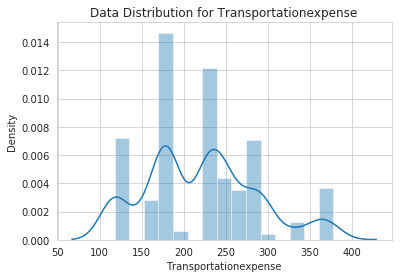

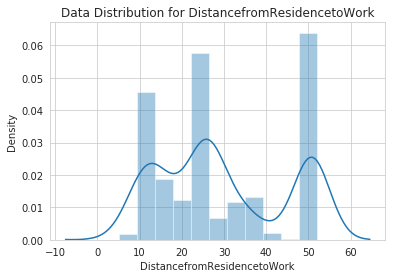

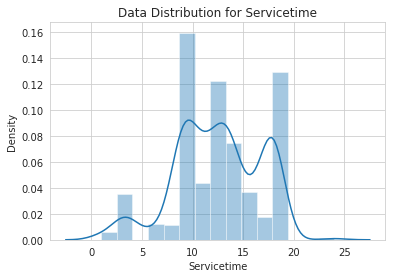

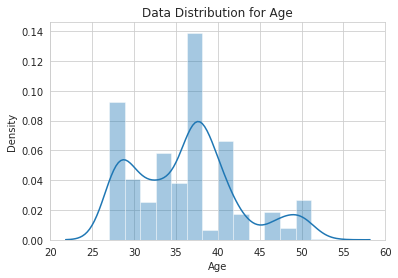

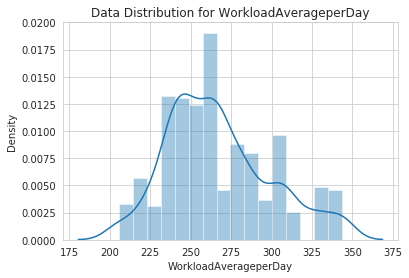

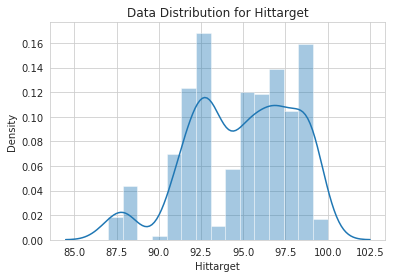

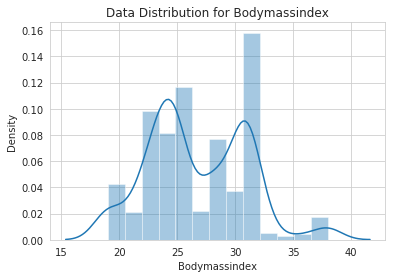

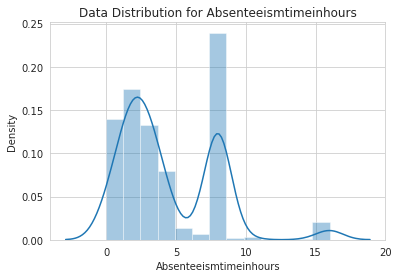

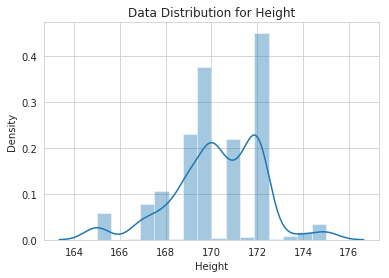

In [35]:
#First Check distribution of Data

for i in num:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(data[i],bins = 'auto')
    plt.title("Data Distribution for "+str(i))
    plt.ylabel("Density")
    plt.savefig('{i}_Vs_Density.png'.format(i=i))
    plt.show()

In [36]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
data['Absenteeismtimeinhours'] = np.log1p(data['Absenteeismtimeinhours'])

In [37]:
#Normalization
for i in num:
    print(i)
    data[i] = (data[i] - min(data[i]))/(max(data[i]) - min(data[i]))

Transportationexpense
DistancefromResidencetoWork
Servicetime
Age
WorkloadAverageperDay
Hittarget
Bodymassindex
Absenteeismtimeinhours
Height


In [38]:
data.describe()

,Reasonforabsence,Dayoftheweek,Transportationexpense,DistancefromResidencetoWork,Servicetime,Age,WorkloadAverageperDay,Hittarget,Disciplinaryfailure,Son,Socialdrinker,Height,Bodymassindex,Absenteeismtimeinhours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,19.204054,3.914865,0.394832,0.524066,0.497650,0.351893,0.443972,0.608543,0.052703,1.009459,0.568919,0.526764,0.404599,0.525339
std,8.423836,1.421675,0.254271,0.315676,0.181293,0.235029,0.233210,0.237602,0.223590,1.094292,0.495562,0.194085,0.225250,0.232853
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,3.000000,0.234615,0.234043,0.347826,0.153846,0.280116,0.461538,0.000000,0.000000,0.000000,0.400000,0.263158,0.387762
50%,23.000000,4.000000,0.411538,0.446809,0.521739,0.384615,0.424739,0.615385,0.000000,1.000000,1.000000,0.500000,0.315789,0.489301
75%,26.000000,5.000000,0.546154,0.957447,0.652174,0.500000,0.574766,0.769231,0.000000,2.000000,1.000000,0.699999,0.631579,0.775524
max,28.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000


# Modelling

In [39]:
data = pd.get_dummies(data,columns=cat)

X= data.drop(['Absenteeismtimeinhours'],axis=1)
Y= data['Absenteeismtimeinhours']

#Divide data into train and test-
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=.25)



In [40]:
def MAE(actual,predicted):
    mae=mean_squared_error(actual,predicted)
    return mae

In [41]:
def RMSE(actual,predicted):
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    return rmse

# Decision Tree


In [42]:

DT_Model = DecisionTreeRegressor(random_state = 1).fit(X_train,Y_train)

DT_Model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [43]:
DT_predict = DT_Model.predict(X_test)
DT_predict = pd.DataFrame(DT_predict)

In [44]:

MAE_DT=MAE(Y_test,DT_predict)
RMSE_DT=RMSE(Y_test,DT_predict)
R2_DT=r2_score(Y_test,DT_predict)

print(RMSE_DT,MAE_DT,R2_DT)

0.19111008468333357 0.03652306446767093 0.3726805054301964


In [45]:
## RMSE : 0.2191078
## MAE:   0.048331886
## R2 Score :  0.18352315

# Random Forest

In [46]:
Rf_model=RandomForestRegressor(n_estimators=300).fit(X_train,Y_train)

In [47]:
Rf_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [48]:
Rf_predict=Rf_model.predict(X_test)

In [49]:
RMSE_RF=RMSE(Y_test,Rf_predict)


MAE_RF=MAE(Y_test,Rf_predict)


R2_RF=r2_score(Y_test,Rf_predict)
print(RMSE_RF,MAE_RF,R2_RF)

0.15736179021410046 0.02476273301938656 0.5746757456335873


In [50]:
## RMSE:   0.18655826
## MAE:      0.03462693
## R2 Score:   0.412840

In [51]:
Rf_model.feature_importances_

array([5.95174389e-02, 1.87152434e-02, 2.21957423e-02, 2.77730577e-02,
       7.44190818e-02, 7.27926898e-02, 4.75423346e-02, 3.72494321e-02,
       1.51072298e-01, 3.76228800e-03, 5.16989392e-04, 3.84379931e-05,
       2.72907714e-03, 1.85157900e-03, 1.63609890e-03, 4.91052102e-03,
       7.42913621e-04, 3.38593330e-03, 3.37669096e-03, 1.27270133e-02,
       3.91891729e-03, 1.14822059e-02, 5.67219388e-03, 2.69164301e-04,
       3.57636469e-03, 0.00000000e+00, 4.06221747e-03, 7.97335751e-03,
       3.59386205e-03, 5.31763941e-03, 7.16122314e-02, 3.14328366e-05,
       2.13150077e-02, 4.70885663e-03, 5.20922927e-02, 7.60759038e-02,
       1.45842099e-02, 1.18547781e-02, 1.15688062e-02, 1.13834803e-02,
       1.09949812e-02, 4.90272079e-03, 6.17856013e-03, 8.02181174e-03,
       1.98511771e-03, 2.46960110e-03, 3.61438185e-02, 3.79199046e-02,
       1.88349743e-02, 4.50072640e-03])

# Linear Regression

In [52]:
import statsmodels.api as sm

In [53]:
LR_model=sm.OLS(Y_train,X_train).fit()

In [54]:
LR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Absenteeismtimeinhours   R-squared:                       0.552
Model:                                OLS   Adj. R-squared:                  0.513
Method:                     Least Squares   F-statistic:                     14.27
Date:                    Sat, 22 Jun 2019   Prob (F-statistic):           8.92e-64
Time:                            08:05:11   Log-Likelihood:                 251.64
No. Observations:                     555   AIC:                            -413.3
Df Residuals:                         510   BIC:                            -218.9
Df Model:                              44                                         
Covariance Type:                nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Transportationexpense           0.1047      0.045      2.338      0.020       0.017       0.193
DistancefromResidencetoWork    -0.0519      0.036     -1.440      0.151      -0.123       0.019
Servicetime                     0.0562      0.071      0.792      0.428      -0.083       0.196
Age                            -0.1025      0.049     -2.090      0.037      -0.199      -0.006
WorkloadAverageperDay          -0.0312      0.031     -1.020      0.308      -0.091       0.029
Hittarget                      -0.0012      0.031     -0.039      0.969      -0.062       0.060
Height                         -0.0381      0.042     -0.918      0.359      -0.120       0.043
Bodymassindex                   0.0230      0.045      0.515      0.607      -0.065       0.111
Reasonforabsence_0.0           -0.3000      0.092     -3.269      0.001      -0.480      -0.120
Reasonforabsence_1.0            0.1185      0.046      2.561      0.011       0.028       0.209
Reasonforabsence_2.0           -0.0914      0.158     -0.577      0.564      -0.403       0.220
Reasonforabsence_3.0            0.2041      0.158      1.291      0.197      -0.107       0.515
Reasonforabsence_4.0           -0.0820      0.113     -0.723      0.470      -0.305       0.141
Reasonforabsence_5.0            0.1272      0.092      1.385      0.167      -0.053       0.308
Reasonforabsence_6.0            0.1015      0.065      1.550      0.122      -0.027       0.230
Reasonforabsence_7.0            0.0187      0.045      0.419      0.676      -0.069       0.107
Reasonforabsence_8.0           -0.1075      0.113     -0.954      0.341      -0.329       0.114
Reasonforabsence_9.0            0.2325      0.092      2.523      0.012       0.051       0.414
Reasonforabsence_10.0           0.1125      0.040      2.814      0.005       0.034       0.191
Reasonforabsence_11.0           0.0115      0.038      0.300      0.764      -0.064       0.086
Reasonforabsence_12.0          -0.0523      0.066     -0.795      0.427      -0.181       0.077
Reasonforabsence_13.0           0.0848      0.029      2.928      0.004       0.028       0.142
Reasonforabsence_14.0           0.0125      0.045      0.275      0.784      -0.077       0.101
Reasonforabsence_15.0           0.1264      0.112      1.127      0.260      -0.094       0.347
Reasonforabsence_16.0          -0.1969      0.092     -2.131      0.034      -0.378      -0.015
Reasonforabsence_17.0       -1.327e-16   1.12e-16     -1.182      0.238   -3.53e-16    8.78e-17
Reasonforabsence_18.0           0.1338      0.042      3.181      0.002       0.051       0.216
Reasonforabsence_19.0           0.0867      0.032      2.730      0.007       0.024       0.149
Reasonforabsence_21.0           0.0383      0.066      0.584   

In [55]:
LR_predict=LR_model.predict(X_test)

In [56]:
RMSE_LR=RMSE(Y_test,LR_predict)


MAE_LR=MAE(Y_test,LR_predict)


R2_LR=r2_score(Y_test,LR_predict)
print(RMSE_RF,MAE_RF,R2_RF)

0.15736179021410046 0.02476273301938656 0.5746757456335873


In [57]:
##  RMSE:  0.18755826
## MAE :    0.0345269
## R2 Score:   0.41284